Jumlah Sel Darah: 48


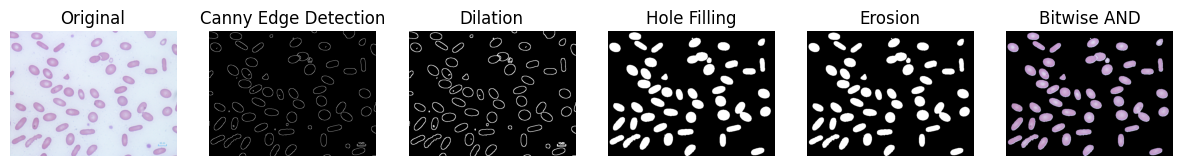

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Membaca gambar
image = cv2.imread('Dataset/707.jpg')

# Mengkonversi gambar ke grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Mengaplikasikan Gaussian blur dengan kernel yang lebih kecil
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# Menggunakan Canny Edge Detection dengan threshold yang lebih rendah
edges = cv2.Canny(blurred, 70, 110)

# Dilasi untuk memperluas area yang terdeteksi
kernel = np.ones((2, 2), np.uint8)  # Kernel untuk dilasi
dilated_edges = cv2.dilate(edges, kernel, iterations=1)  # Dilasi untuk memperbesar tepi

# Menemukan semua kontur pada gambar yang sudah dilakukan Canny Edge Detection
# setelah dilasi
contours, _ = cv2.findContours(dilated_edges, cv2.RETR_EXTERNAL,
                                cv2.CHAIN_APPROX_SIMPLE)

# Membuat salinan gambar untuk hole filling
filled_image = np.zeros_like(image)  # Gambar kosong yang akan diisi

# Menggambar dan mengisi kontur
count = 0
for contour in contours:
    # Menggambar kontur dan mengisinya dengan warna putih (atau warna lain
    # sesuai preferensi)
    area = cv2.contourArea(contour)
    if area >= 280:
        cv2.drawContours(filled_image, [contour], -1, (255, 255, 255),
                         thickness=cv2.FILLED)
        count += 1
print(f"Jumlah Sel Darah: {count}")

# Erosi untuk mengurangi area yang telah diisi
eroded_image = cv2.erode(filled_image, kernel, iterations=1)  # Erosi untuk
# mengurangi area yang terisi

# Mengonversi eroded_image menjadi grayscale jika diperlukan (bila tidak biner)
eroded_image_gray = cv2.cvtColor(eroded_image, cv2.COLOR_BGR2GRAY)

# Menggunakan threshold untuk memastikan hasilnya biner
_, binary_eroded_image = cv2.threshold(eroded_image_gray, 1, 255,
                                       cv2.THRESH_BINARY)

# Melakukan operasi bitwise AND antara gambar asli (berwarna) dan gambar biner
# hasil erosi
bitwise_result = cv2.bitwise_and(image, image, mask=binary_eroded_image)

# Membuat folder output jika belum ada
output_folder = 'output'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Menyimpan gambar ke folder output
cv2.imwrite(os.path.join(output_folder, 'original_image.jpg'), image)
cv2.imwrite(os.path.join(output_folder, 'edges.jpg'), edges)
cv2.imwrite(os.path.join(output_folder, 'dilated_edges.jpg'), dilated_edges)
cv2.imwrite(os.path.join(output_folder, 'filled_image.jpg'), filled_image)
cv2.imwrite(os.path.join(output_folder, 'eroded_image.jpg'), eroded_image)
cv2.imwrite(os.path.join(output_folder, 'bitwise_result.jpg'), bitwise_result)

# Menampilkan gambar
plt.figure(figsize=(15, 8))

# Gambar Asli
plt.subplot(1, 6, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

# Gambar setelah Canny Edge Detection
plt.subplot(1, 6, 2)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

# Gambar setelah dilasi
plt.subplot(1, 6, 3)
plt.imshow(cv2.cvtColor(dilated_edges, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title("Dilation")
plt.axis('off')

# Gambar setelah hole filling
plt.subplot(1, 6, 4)
plt.imshow(cv2.cvtColor(filled_image, cv2.COLOR_BGR2RGB))
plt.title("Hole Filling")
plt.axis('off')

# Gambar setelah erosi pada area yang telah diisi
plt.subplot(1, 6, 5)
plt.imshow(cv2.cvtColor(eroded_image, cv2.COLOR_BGR2RGB))
plt.title("Erosion")
plt.axis('off')

# Gambar hasil operasi bitwise AND antara gambar asli dan gambar hasil erosi
# (berwarna)
plt.subplot(1, 6, 6)
plt.imshow(cv2.cvtColor(bitwise_result, cv2.COLOR_BGR2RGB))
plt.title("Bitwise AND")
plt.axis('off')

# Menampilkan gambar
plt.show()
